In [69]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Dataset and Train-Test function
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Classifactions sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# Classification Keras + Tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
# TabPFNClassificaion
from tabpfn import TabPFNClassifier

##### Load Dataset

In [38]:
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target
X.shape, y.shape

((1456, 50, 37), (1456,))

The shape show us that we have a dataset with 1456 images with a 50x37 pixel resolution

##### Positive-Negative Image

Text(0.5, 1.0, 'Positive class Image')

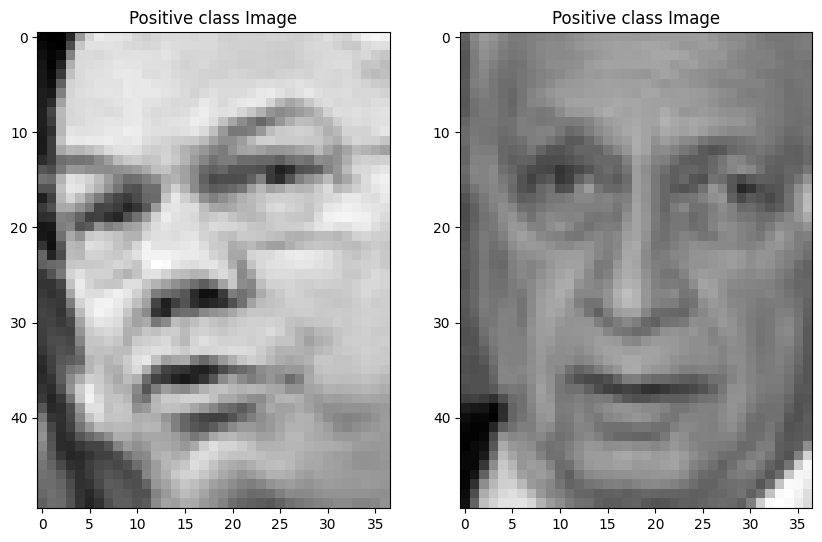

In [3]:
# Plot a positive and negative image for classifications purposes
plt.figure(figsize=(10,10))
# Positive
plt.subplot(1,2,1)
plt.imshow(X[y==1][0], cmap='gray')
plt.title('Positive class Image')
# Negative
plt.subplot(1,2,2)
plt.imshow(X[y==0][0], cmap='gray')
plt.title('Positive class Image')

In [14]:
# This will show us if we are ir [0,1] range or [0, 255]
np.min(X),np.max(X)

(0.0, 1.0)

As we can see, we don't have to normalize the images to [0, 1] range cause we already are in it

In [34]:
# We want to know how many people we have in the dataset to classify
len(np.unique(y))

10

### First dataset implementations

#### Data preprocessing

In [41]:
X_reshape = X.reshape((X.shape[0], -1 )) # Flatten image

labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y)
X_reshape.shape, y_encoded.shape

((1456, 1850), (1456,))

#### Split the dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_encoded, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 1850), (292, 1850), (1164,), (292,))

#### Classifiers

##### SVC ( Support Vector Machines)

In [48]:
svm_classifier = SVC()

svm_classifier.fit(X_train, (y_train==0))

SVC()

In [59]:
y_pred = svm_classifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==0, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==0, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==0, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==0, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       278
        True       0.00      0.00      0.00        14

    accuracy                           0.95       292
   macro avg       0.48      0.50      0.49       292
weighted avg       0.91      0.95      0.93       292


Confusion-Matrix: 
[[278   0]
 [ 14   0]]

ROC-AUC-Score: 
0.5

Accuracy-Score: 
0.952054794520548


/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

##### Logistic Regression 

In [62]:
logisticClassifier = LogisticRegression()

logisticClassifier.fit(X_train, (y_train==0))

LogisticRegression()

In [63]:
y_pred = logisticClassifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==0, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==0, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==0, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==0, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       278
        True       0.58      0.50      0.54        14

    accuracy                           0.96       292
   macro avg       0.78      0.74      0.76       292
weighted avg       0.96      0.96      0.96       292


Confusion-Matrix: 
[[273   5]
 [  7   7]]

ROC-AUC-Score: 
0.7410071942446043

Accuracy-Score: 
0.958904109589041


##### Neural Network

In [67]:
neuralModelo = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
neuralModelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
history = neuralModelo.fit(X_train, (y_train == 0), epochs=100, batch_size=32, validation_split=.2)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0125 - val_accuracy: 0.9657 - val_loss: 0.2605
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9657 - val_loss: 0.2457
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0104 - val_accuracy: 0.9657 - val_loss: 0.2235
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9700 - val_loss: 0.2524
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.9657 - val_loss: 0.2474
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0033 - val_accuracy: 0.9485 - val_loss: 0.4197
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0290 - val_accuracy: 0.9399 - val_loss: 0.2405
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9657 - v

In [77]:
y_pred = neuralModelo.predict(X_test).astype(int)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==0, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==0, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==0, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==0, y_pred)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       278
        True       0.00      0.00      0.00        14

    accuracy                           0.95       292
   macro avg       0.48      0.50      0.49       292
weighted avg       0.91      0.95      0.93       292


Confusion-Matrix: 
[[278   0]
 [ 14   0]]

ROC-AUC-Score: 
0.5

Accuracy-Score: 
0.952054794520548


/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [84]:
plt.figure(figsize=(10,10))
# Subplot for loss 

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>